In [1]:
import numpy as np
from sedfitter import fit, plot
from sedfitter.extinction import Extinction
from astropy import units as u
from astropy.constants import c as c_light_speed
from astropy.io import fits as pyfits
from sedfitter.utils import parfile
import matplotlib.pyplot as plt

In [2]:
base_dir = '/Users/ratzenboe/Documents/work/data_local/spectal_models/yso_models/'
model_dir = base_dir + 'models_r06'
ext_fname = base_dir + 'extinction/kmh94.par'
data_fname = base_dir + 'example_data_robitaille/data_glimpse.txt'

In [3]:
filters = ['2J', '2H', '2K', 'I1', 'I2', 'I3', 'I4']
apertures = [3., 3., 3., 3., 3., 3., 3.] * u.arcsec
apertures *= 0.0001

In [4]:
modpar = parfile.read("%s/models.conf" % model_dir, 'conf')
modpar.get('version', 1)

1

In [5]:
# # Define filters and apertures
# filters = ['2J', '2H', '2K', 'I1', 'I2', 'I3', 'I4']
# apertures = [3., 3., 3., 3., 3., 3., 3.] * u.arcsec
#
# # Read in extinction law)
# extinction = Extinction.from_file(
#     ext_fname, columns=[0, 3],
#     wav_unit=u.micron, chi_unit=u.cm**2 / u.g
# )
#
# # Run the fitting
# fit(data_fname,
#     filters, apertures, model_dir,
#     'output.fitinfo',
#     distance_range=[1., 2.] * u.kpc,
#     extinction_law=extinction,
#     av_range=[0., 40.]
# )

 ------------------------------------------------------------
  => Model parameters
 ------------------------------------------------------------

   Models              :  YSO models
   Log[d] stepping     :  0.01
   Number of distances :  32

 ------------------------------------------------------------
  => Reading in convolved fluxes
 ------------------------------------------------------------

   Reading /Users/ratzenboe/Documents/work/data_local/spectal_models/yso_models/models_r06/convolved/2J.fits
   Reading /Users/ratzenboe/Documents/work/data_local/spectal_models/yso_models/models_r06/convolved/2H.fits
   Reading /Users/ratzenboe/Documents/work/data_local/spectal_models/yso_models/models_r06/convolved/2K.fits
   Reading /Users/ratzenboe/Documents/work/data_local/spectal_models/yso_models/models_r06/convolved/I1.fits
   Reading /Users/ratzenboe/Documents/work/data_local/spectal_models/yso_models/models_r06/convolved/I2.fits
   Reading /Users/ratzenboe/Documents/work/data_loca

In [6]:
# # For the remaining commands, we always select the models with chi^2-chi_best^2
# # per datapoint less than 3.
# select_format = ('F', 3)
#
# # Make SED plots
# plot('output.fitinfo', 'dev/plots_seds', plot_max=100, select_format=select_format)

# New SEDs

In [5]:
from astropy.table import Table
from sedfitter.sed import SEDCube

In [6]:
fname_flux_r24 = '/Users/ratzenboe/Documents/work/data_local/spectal_models/yso_models/models_richardson24/spubhmi/flux.fits'
fname_params_r24 = '/Users/ratzenboe/Documents/work/data_local/spectal_models/yso_models/models_richardson24/spubhmi/parameters.fits'

In [7]:
t = Table.read(fname_params_r24)

In [26]:
# Load flux data
seds = SEDCube.read(fname_flux_r24)

In [59]:
seds.apertures.size, seds.wav.size, seds.nu.size

(20, 200, 200)

In [214]:
sed = seds.get_sed('zzwyga70_07')

In [216]:
distance = 100 * u.pc
(u.kpc / distance.to(u.kpc))**2

<Quantity 100.>

In [217]:
f_nu = sed.flux
# Convert to erg/s/cm²/Hz
f_nu_cgs = f_nu.to(u.erg / u.s / u.cm**2 / u.Hz)
# Convert wavelength to cm
lam_cm = sed.wav.to(u.cm)
# Apply conversion
f_lambda = (f_nu_cgs * c_light_speed) / lam_cm**2
# Output in erg/s/cm²/Å (flam)
f_lambda = f_lambda.to(u.erg / u.s / u.cm**2 / u.AA)
f_lambda *= (u.kpc / distance.to(u.kpc)) ** 2

In [224]:
np.log10(28.02)

1.4474681309497557

(1e-20, 1e-09)

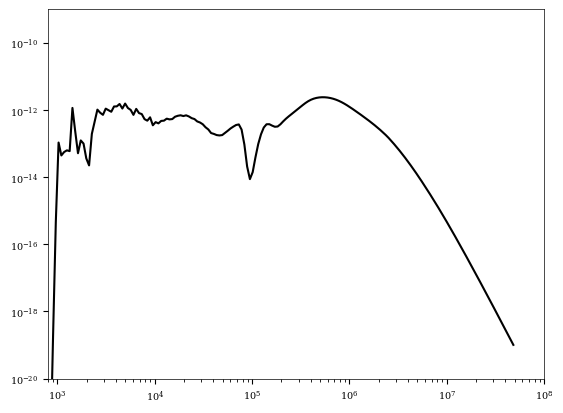

In [222]:
_ = plt.loglog(sed.wav.to(u.AA), f_lambda.T[:,-1], 'k-', alpha=1)
plt.xlim(800, 1e8)
plt.ylim(1e-20, 1e-9)